# MLBデータ探索
- [MLBデータサイトの統計データ](http://www.seanlahman.com/baseball-archive/statistics/)から「Download 2016 Version」「2016 – comma-delimited version」を取得
- この中から、データ探索対象をTeams.csvに絞る

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mlb_team = pd.read_csv('./core/Teams.csv')

# ①ランキングと勝敗の関係は？
- 各ランクごとの、勝利数平均、敗北数平均を出してみた

In [2]:
mlb_team[['Rank', 'W']].groupby(['Rank'], as_index=False)\
.mean().sort_values(by='W', ascending=False)

,Rank,W
0,1,92.901914
1,2,86.102564
2,3,80.431655
3,4,74.866667
4,5,69.807107
5,6,64.741497
6,7,59.439614
8,9,52.354839
7,8,50.775862
9,10,49.192308


In [3]:
mlb_team[['Rank', 'L']].groupby(['Rank'], as_index=False)\
.mean().sort_values(by='L', ascending=False)

,Rank,L
7,8,91.856322
11,12,91.400000
6,7,86.072464
5,6,83.666667
9,10,83.653846
4,5,81.451777
3,4,77.404762
8,9,75.645161
2,3,71.071942
10,11,70.846154


ランクと勝利数は、ランクが上がれば勝利数が上がる正の相関関係にあることがわかる。他方、ランクと敗北数はランクが上がれば敗北数が下がる、あるいは上がるといった単純な相関関係に無いことがわかる。  
このことから、もしもランクをあげることが目的であるならば、同点で迎えた延長戦などの状況では「負けを気にせず思い切って勝利を取りにいく戦略」が良さそうである

# ②ランキングとヒットの関係は？
- 各ランクごとの、ヒット数平均を出してみた

In [4]:
mlb_team[['Rank', 'H']].groupby(['Rank'], as_index=False)\
.mean().sort_values(by='H', ascending=False)

,Rank,H
0,1,1418.265550
1,2,1391.601399
2,3,1380.014388
3,4,1370.938095
4,5,1343.319797
5,6,1300.176871
6,7,1278.961353
7,8,1230.287356
9,10,1129.076923
11,12,1120.600000


概ね、ランクが上がればヒット数が上がる正の相関関係にあることがわかる。もしもランクをあげることが目的であるならば、とにかくヒットを出すことが良さそうであり、なにはなくともヒットを出せる選手を入れることがランクをあげることに繋がる、と言えそうである

# ③ホームランと勝利の関係は？
- 横軸にホームラン数、縦軸に勝利数で、散布図を出してみた

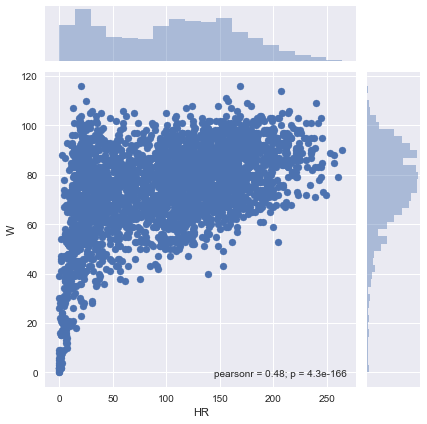

In [5]:
sns.jointplot(x="HR", y="W", data=mlb_team)

勝利数は正規分布に近く、ホームラン数は山が２つのよく分からない分布である。  
散布の状態から、勝利数がある一定以上であれば、ホームラン数が多くなることがわかる。つまり、ホームラン数がいくら多くても、勝利数が上がるとは限らないことになる。  
ならばなぜ、ホームラン、及びホームランバッターは野球において注目されるのか？

# ④最も勝利数に貢献するのは何か？
- 各年で、勝利数に最も強く正の相関を示す列名を出す。例えば、１８７１年は得点'R'
- 上で出した列名毎にyearIDをカウントし、多い順に３つ出してみた　　

In [18]:
# 'yearID'列をとりだし、全行を一旦リストにして、その後、
# 集合にして重複を無くしてから、再びリストにする
col = 'yearID'
cuts = list(set(mlb_team[[col]].values.flatten()))

# col_factorsリストに、
# 各年と、各年毎に勝利数に最も強く正の相関を示す列名を格納する
col_factors = []
for cut in cuts:
    cut_mlb_team = mlb_team[mlb_team[col].isin([cut])]
    col_factors.append([str(cut), cut_mlb_team.corr().loc['W'].drop(['W']).\
                    sort_values(ascending=False).head(1).index.values[0]])

# 上記で格納した列名を'the　Factors'としてgroupby。
# col_factorsリスト内の個数を集計し、多い順に３つ出す
pd.DataFrame(col_factors).rename(columns={0: col, 1: 'the Factors'}).\
groupby(['the Factors']).count().sort_values(by=col, ascending=False).head(3)

,yearID
the Factors,
R,64
attendance,28
SV,19


1位が得点'R'はいかにもだが、2位がホーム観客総動員数'attendance'は意外に感じた。  
3位が「救援投手が最後までリードを守りきった回数」'SV'、投手の力量を測る重要指標  

ここで、③における疑問「なぜ、ホームラン、及びホームランバッターは野球において注目されるのか？」について１つ合点が行く答えが見えてくる。ホームラン自体は直接勝利数に貢献しないが、おそらくはattendanceに貢献するのだろう。ホームランで人気を稼げば、attendanceが上がり、attendanceが上がれば、勝利数に貢献するのだ。だからこそ、地味に得点を取れる選手と、attendanceを取れるホームランバッターの両方が、選手獲得において重要なのだ

# ⑤最もattendanceに貢献するのは何か？
- 勝利数の場合と同様にして、多い順に３つ出してみた
- また、最も強く負の相関を示すものについても出してみた

In [7]:
# 'yearID'列をとりだし、全行を一旦リストにして、その後、
# 集合にして重複を無くしてから、再びリストにする
col = 'yearID'
cuts = list(set(mlb_team[[col]].values.flatten()))

# col_factorsリストに、
# 各年と、各年毎にattendanceに最も強く正の相関を示す列名を格納する
col_factors = []
for cut in cuts:
    cut_mlb_team = mlb_team[mlb_team[col].isin([cut])]
    col_factors.append([str(cut), cut_mlb_team.corr().loc['attendance'].\
                        drop(['attendance']).sort_values(ascending=False).\
                        head(1).index.values[0]])

# 上記で格納した列名を'the　Factors'としてgroupby。
# col_factorsリスト内の個数を集計し、多い順に３つ出す
pd.DataFrame(col_factors).rename(columns={0: col, 1: 'the Factors'}).\
groupby(['the Factors']).count().sort_values(by=col, ascending=False).head(3)

,yearID
the Factors,
W,65
yearID,19
HR,7


In [8]:
# 'yearID'列をとりだし、全行を一旦リストにして、その後、
# 集合にして重複を無くしてから、再びリストにする
col = 'yearID'
cuts = list(set(mlb_team[[col]].values.flatten()))

# col_factorsリストに、
# 各年と、各年毎にattendanceに最も強く負の相関を示す列名を格納する
col_factors = []
for cut in cuts:
    cut_mlb_team = mlb_team[mlb_team[col].isin([cut])]
    col_factors.append([str(cut), cut_mlb_team.corr().loc['attendance'].\
                        drop(['attendance']).sort_values(ascending=False).\
                        head(1).index.values[0]])

# 上記で格納した列名を'the　Factors'としてgroupby。
# col_factorsリスト内の個数を集計し、多い順に３つ出す
pd.DataFrame(col_factors).rename(columns={0: col, 1: 'the Factors'}).\
groupby(['the Factors']).count().sort_values(by=col, ascending=False).head(3)

,yearID
the Factors,
W,65
yearID,19
HR,7


1位はやっぱり勝利数'W'。2位が年'yearID'というのは、勝利数以外の項目がほとんど相関していないということか。あるいは、年毎にばらけているのだろう。  
ところで、逆に最もattendanceに対して負の相関を示す項目をみてみると、犠牲フライ'SF'がダントツの１位。来場者を増やしたければ、犠牲フライはやらない方がいい、ということか

# ⑥MLB全体の、attendance推移は？

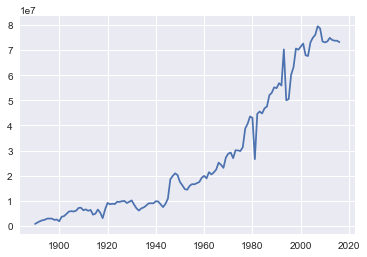

In [9]:
year_atte = mlb_team[['yearID', 'attendance']].\
groupby(['yearID'], as_index=False).sum().dropna()

plt.plot(year_atte[['yearID']], year_atte[['attendance']])

大局的には上昇が続いていたが、２０１０年の少し前をピークに横ばいの傾向が見て取れる

# ⑦MLB全体の、守備率(Fielding  percentage)推移は？

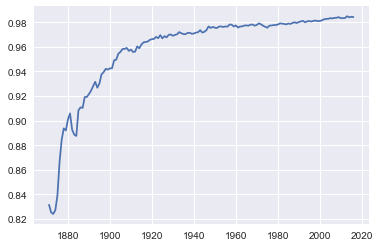

In [10]:
year_fp = mlb_team[['yearID', 'FP']].\
groupby(['yearID'], as_index=False).mean().dropna()

plt.plot(year_fp[['yearID']], year_fp[['FP']])

１８００年代末期から１９００年代初期にかけて急激に良くなる。以後は緩やかな上昇傾向

# ⑧勝利数と集客力(attendance)の二軸で、各チームを比較
- 縦軸は集客数平均、横軸は勝利数平均、各点注釈をチームIDとして、散布図を描く

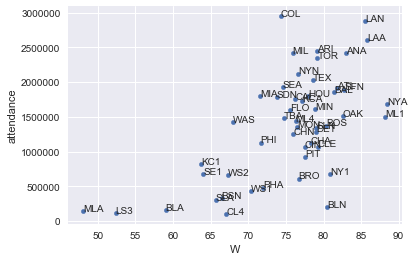

In [11]:
# teamIDを芯にして、各チームの勝利数平均、集客数平均を結合。面倒なのでdropna
team_win = mlb_team[['teamID', 'W']].groupby(['teamID']).mean()
team_atte = mlb_team[['teamID', 'attendance']].groupby(['teamID']).mean()
team_win_atte = team_win.join(team_atte, how='inner').dropna()

# 散布図を描画。indexを各要素のラベルとして貼る
scat = team_win_atte.plot.scatter(x='W',y='attendance')
for i, j in team_win_atte.iterrows():
    scat.annotate(i, xy=(j[0],j[1]), size=10)

さすがに、右上に有名どころが集中している。
- LAN: Los Angeles Dodgers  
- LAA: Los Angeles Angels of Anaheim  
- COL: Colorado Rockies  
- NYA: New York Yankees  
- ML1: Milwaukee Braves

# ⑨エラー数とヒット数の二軸で、一般チームとWS勝者チームを比較
- 縦軸はエラー数、横軸はヒット数として、散布図を描く。向かって左が一般、右が勝者

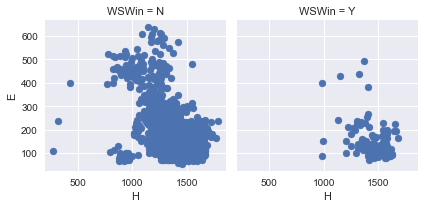

In [12]:
grid = sns.FacetGrid(mlb_team[['WSWin', 'H', 'E']].dropna(), \
                     col='WSWin', size=3, aspect=1)
grid.map(plt.scatter, 'H', 'E')

勝者チームは、エラーが少なく、ヒットが多い。まともな結果

# ⑩盗塁成功数と盗塁失敗数の二軸で、一般チームとWS勝者チームを比較
- 縦軸は盗塁成功数、横軸は盗塁失敗数として、散布図を描く。向かって左が一般、右が勝者

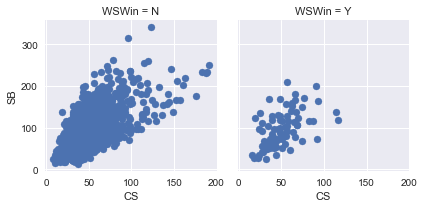

In [13]:
grid = sns.FacetGrid(mlb_team[['WSWin', 'CS', 'SB']].dropna(), \
                     col='WSWin', size=3, aspect=1)
grid.map(plt.scatter, 'CS', 'SB')

勝者チームは、盗塁成功も盗塁失敗も若干少ない。あまり盗塁しないのが勝者の秘訣か